# Appendix

In [5]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml


# Load the dataset (you may need to change the source)
from sklearn.datasets import fetch_openml
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame
df['target'] = np.log(df['MEDV'])

# Define features and target variable


# Generate polynomial features (degree=2 includes interaction and squared terms)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,3.178054
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,3.072693
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,3.546740
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,3.508556
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,3.589059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,3.109061
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,3.025291
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,3.173878
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,3.091042


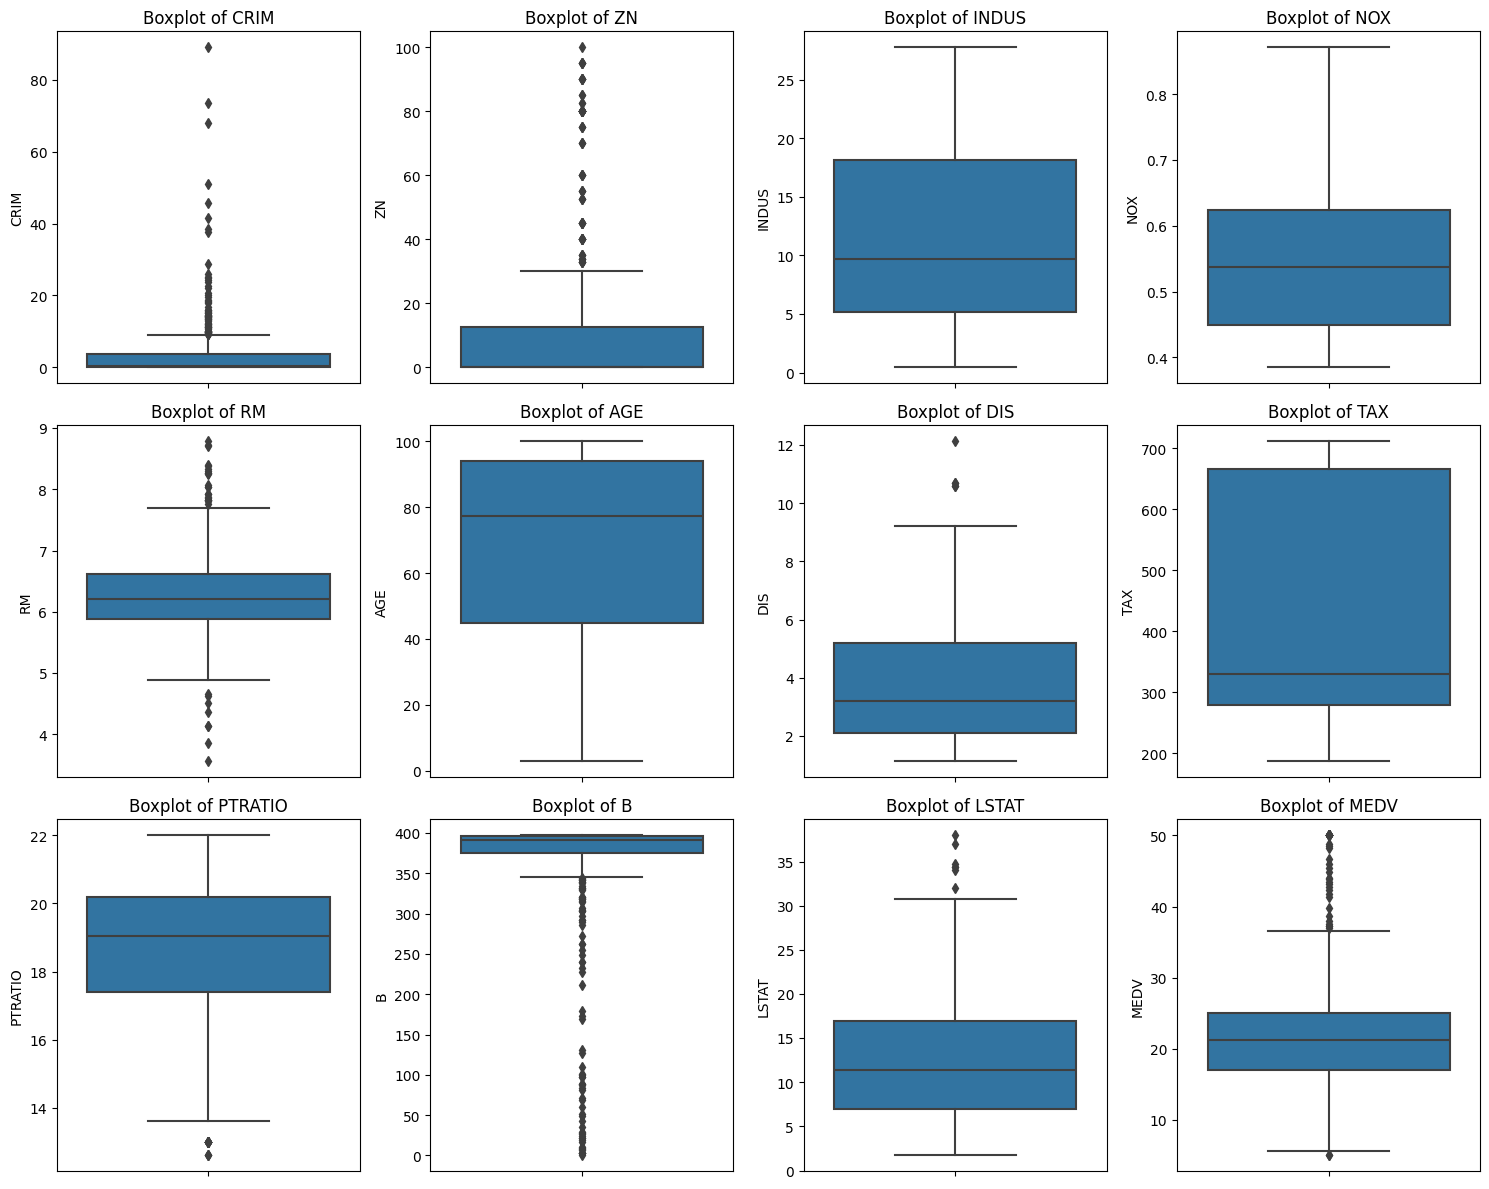

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml



# Drop 'CHAS' and 'RAD' columns
df_boxplot = df.drop(columns=['CHAS', 'RAD', 'target'], errors='ignore')

# Define the number of rows and columns for subplots
num_features = len(df_boxplot.columns)
num_cols = 4  # Number of columns in the subplot grid
num_rows = int(np.ceil(num_features / num_cols))  # Number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
axes = axes.flatten()  # Flatten in case of 2D array

# Plot boxplots for each feature
for i, feature in enumerate(df_boxplot.columns):
    sns.boxplot(y=df_boxplot[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_ylabel(feature)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

plt.savefig('boxplots')
plt.show()


Mean Squared Error: 0.0225
R² Score: 0.8558


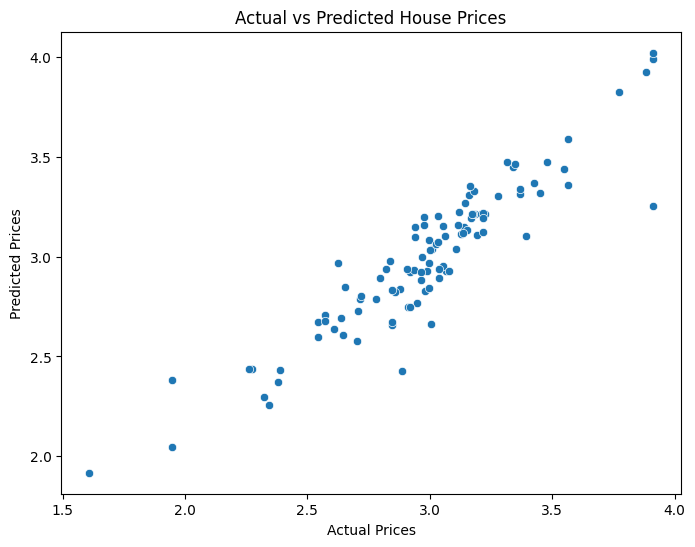

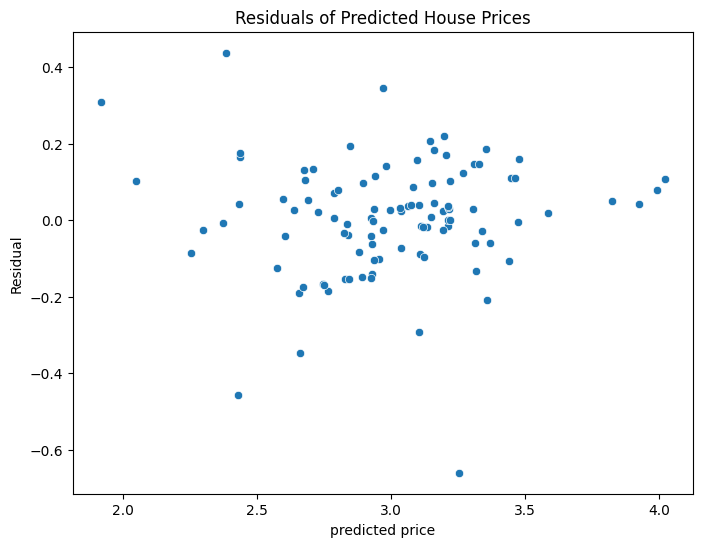

In [9]:
X = df.drop(columns=["MEDV", 'target'])  # MEDV is the target
y = df["target"]

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_poly = poly.fit_transform(X)

# Convert to DataFrame with proper column names
poly_feature_names = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.savefig('pred plot')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=y_pred - y_test)
plt.xlabel("predicted price")
plt.ylabel("Residual")
plt.title("Residuals of Predicted House Prices")
plt.savefig('res plot')
plt.show()

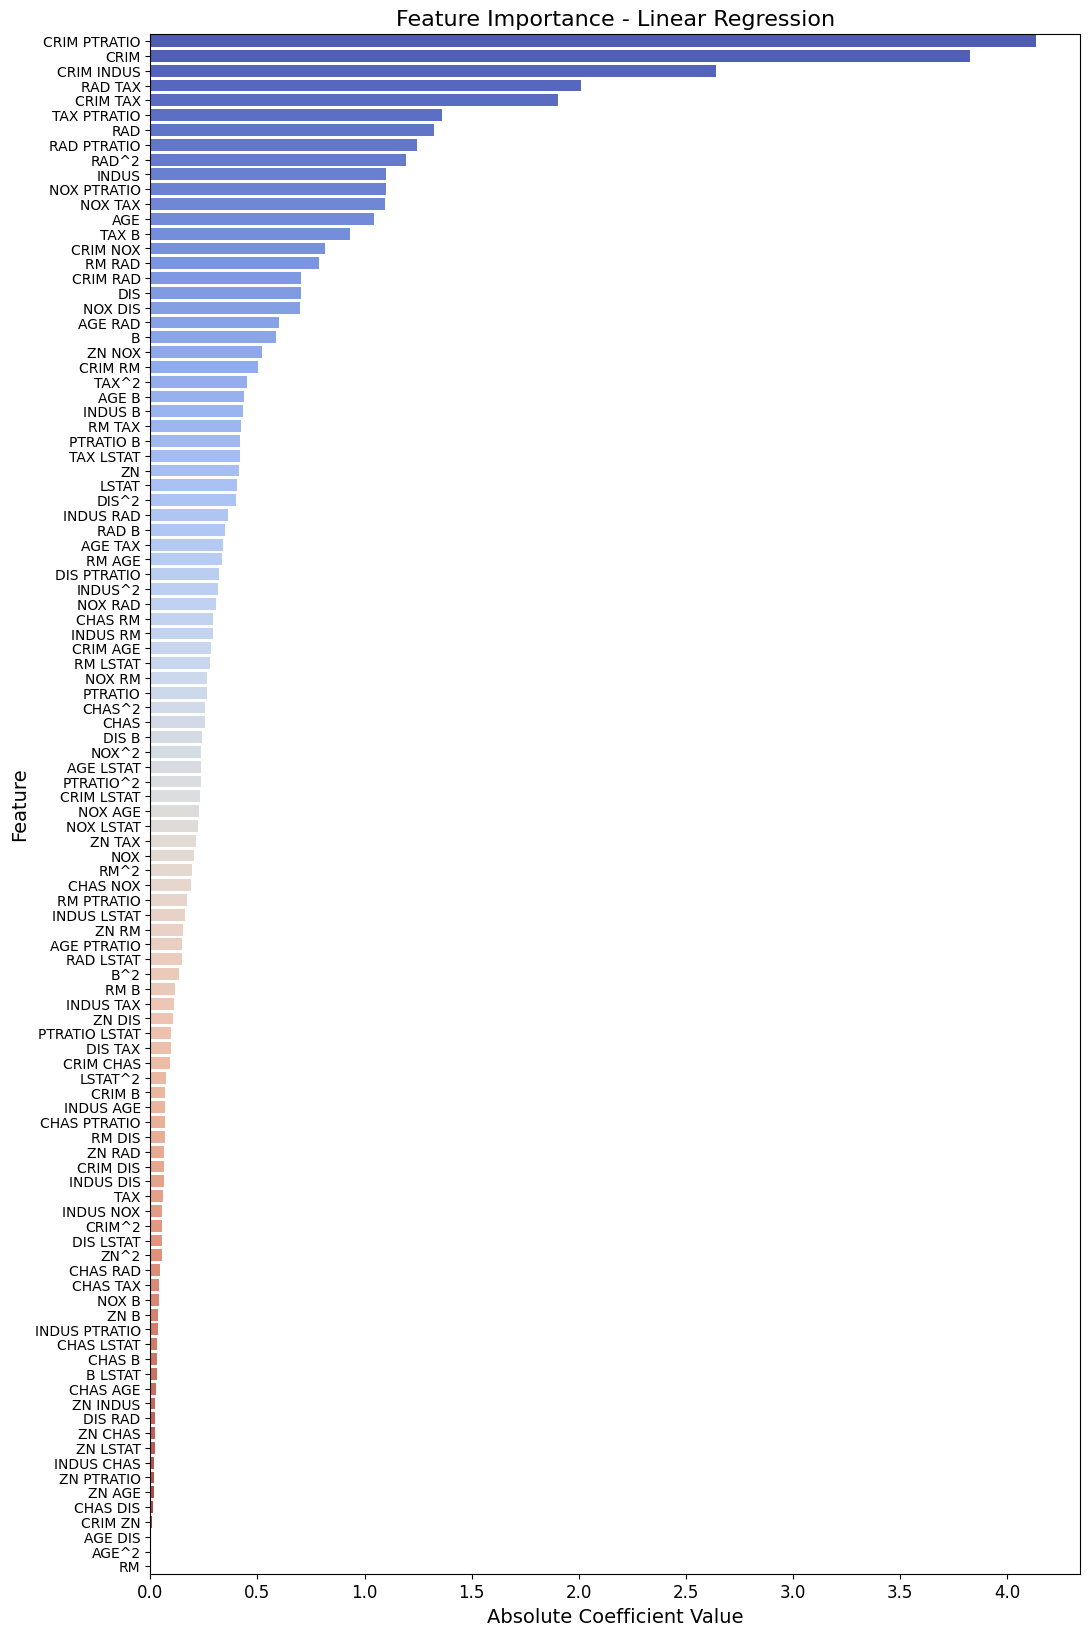

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the model coefficients
coefficients = model.coef_

# Create a DataFrame to associate coefficients with feature names
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Sort features by absolute coefficient value
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 20))  # Increase figure size
sns.barplot(x=importance_df['Abs_Coefficient'], y=importance_df['Feature'], palette="coolwarm")
plt.xlabel("Absolute Coefficient Value", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.title("Feature Importance - Linear Regression", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.savefig('importance plot')
plt.show()



In [48]:
# Set a threshold for feature importance
threshold = 0.1  # Adjust as needed

# Select features with importance above the threshold
selected_features = importance_df[importance_df['Abs_Coefficient'] > threshold]['Feature']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Standardize selected features
scaler = StandardScaler()
X_train_scaled_selected = scaler.fit_transform(X_train_selected)
X_test_scaled_selected = scaler.transform(X_test_selected)

# Train the model again on selected features
model_selected = LinearRegression()
model_selected.fit(X_train_scaled_selected, y_train)

# Predictions
y_pred_selected = model_selected.predict(X_test_scaled_selected)

# Evaluate performance
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f"Mean Squared Error (Selected Features): {mse_selected:.4f}")
print(f"R² Score (Selected Features): {r2_selected:.4f}")


Mean Squared Error (Selected Features): 0.0208
R² Score (Selected Features): 0.8668


In [59]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Boston Housing Dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

# Identify the top 5% of house values
top_5_percent_threshold = np.percentile(df["MEDV"], 95)
high_value_homes = df[df["MEDV"] >= top_5_percent_threshold]

# Normalize the dataset (excluding the target variable "MEDV")
scaler = StandardScaler()
normalized_features = scaler.fit_transform(df.drop(columns=["MEDV"]))
df_normalized = pd.DataFrame(normalized_features, columns=df.columns[:-1])

# Apply the same transformation to high-value homes
high_value_features = scaler.transform(high_value_homes.drop(columns=["MEDV"]))
high_value_homes_normalized = pd.DataFrame(high_value_features, columns=df.columns[:-1])

# Compute mean differences between high-value homes and the full dataset
mean_difference = abs(high_value_homes_normalized.mean() - df_normalized.mean())

# Compute variance in high-value homes
feature_variance = high_value_homes_normalized.var()

# Compute adjusted importance: Higher mean difference & lower variance = More importance
adjusted_importance = mean_difference / (feature_variance + 1e-6)  # Avoid division by zero

# Rank features by adjusted importance
feature_ranking = adjusted_importance.sort_values(ascending=False).reset_index()
feature_ranking.columns = ["Feature", "Importance"]

# Save ranking results
feature_ranking.to_csv("variance_adjusted_ranked_features.csv", index=False)
print("Feature ranking (adjusted for variance) saved to 'variance_adjusted_ranked_features.csv'.")

# Display the top-ranked features
print(feature_ranking)


Feature ranking (adjusted for variance) saved to 'variance_adjusted_ranked_features.csv'.
    Feature  Importance
0         B   20.733485
1     LSTAT   17.097535
2      CRIM    2.145763
3        RM    1.254834
4   PTRATIO    0.776555
5       DIS    0.539240
6       TAX    0.316052
7     INDUS    0.273523
8       NOX    0.251275
9      CHAS    0.248095
10       ZN    0.201307
11      RAD    0.136940
12      AGE    0.017226
